# Introduction 

In the following notebook, I will preparing the 2020_0505_Cleaned_Energy_Dataset.csv for forecasting electricity load demands in Spain

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Image
import warnings

from TimeseriesPlotter import timeseries_plot

**Set notebook preferences**

In [22]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

#Font dictionary for plot titles and labels
font_title = {'fontsize' : 24, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

font_label = {'fontsize' : 16, 
              'style':'italic',
              'fontweight' : 'semibold',
             'fontname':'Gill Sans MT'}

#Set path to load visualizations from EDA 
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Exploratory_Data_Analysis\Load'

#Set path to write new visualizations from current file
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\Data_Processing'

#Surpress warnings
warnings.filterwarnings('ignore')

**Read in data**

In [23]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0514_Weather_Energy.csv', 
                 parse_dates=['date_time'], index_col='date_time')

#Drop columns not pertaining to load
df = df[['load','load_forecast']]

# Data Overview

**Data Dictionary**

* **date_time**: Datetime index localized to CET
* **load_forecast**: forecasted electrical demand
* **load**: actual electrical demand MWh

**Data Preview**

In [24]:
#Print df shape
print('Shape of data:', df.shape)

#View head
display(df.head())

Shape of data: (35072, 2)


,load,load_forecast
date_time,,
2015-01-01 00:00:00,25385.0,26118.0
2015-01-01 01:00:00,24382.0,24934.0
2015-01-01 02:00:00,22734.0,23515.0
2015-01-01 03:00:00,21286.0,22642.0
2015-01-01 04:00:00,20264.0,21785.0


**About the data**

In [25]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
               load  load_forecast
count  35072.000000   35072.000000
mean   28695.654824   28710.230469
std     4577.180735    4595.299568
min    18041.000000   18105.000000
25%    24805.000000   24791.750000
50%    28901.000000   28905.000000
75%    32194.000000   32263.000000
max    41015.000000   41390.000000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35072 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   load           35072 non-null  float64
 1   load_forecast  35072 non-null  float64
dtypes: float64(2)
memory usage: 822.0 KB
None


# Quick EDA

**Raw Load Data Timeplot**

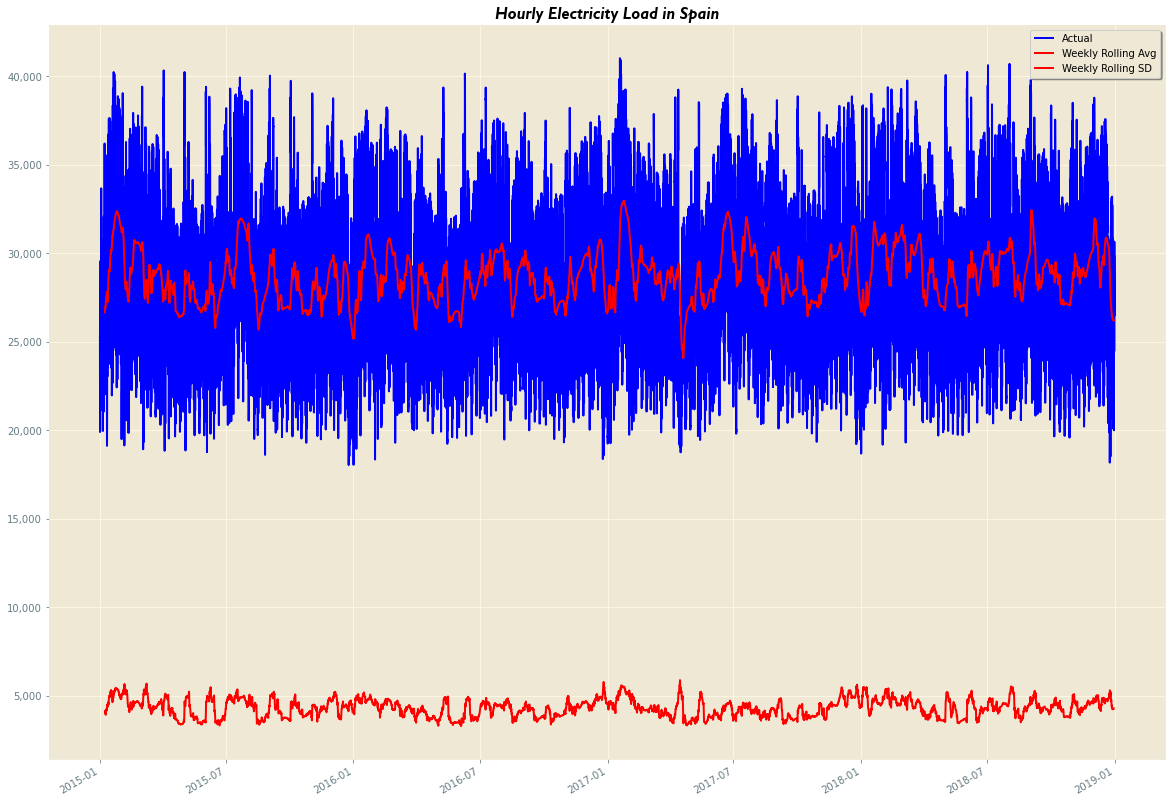

In [26]:
#Raw data plot
Image(filename = eda_path + "/Hourly_Load.png", width=800, height=500,unconfined=True)

**Raw Load Data Autocorrelation Plots**

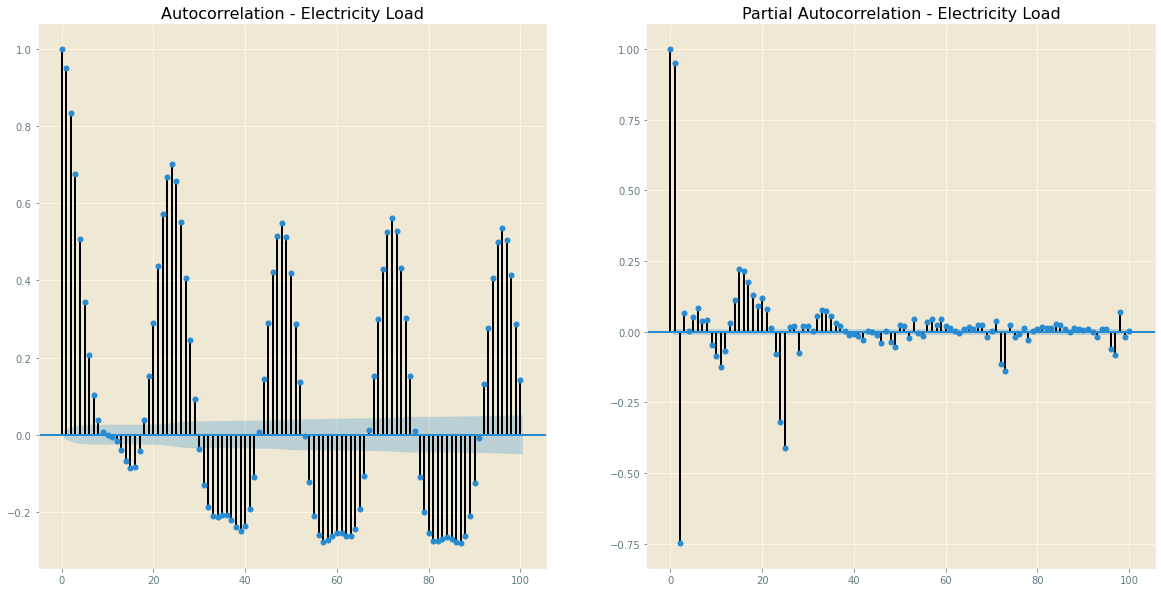

In [27]:
#Raw data plot
Image(filename = eda_path + "/ACF_PACF_Hourly_Load.png", width=1000, height=500,unconfined=True)

**Raw Load Data Decomposition Plot**

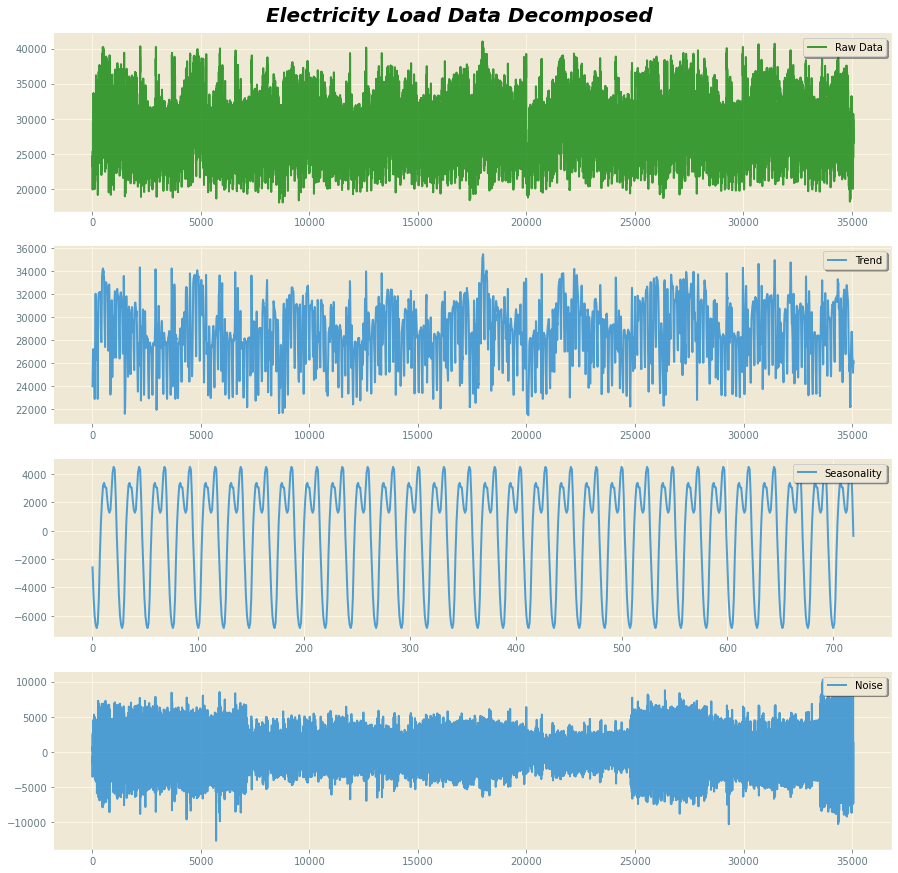

In [28]:
#Raw data decomposition plot
Image(filename = eda_path + "/Hourly_Load_Decomposed.png", width=800, height=500,unconfined=True)

#Preprocessing

## Stationarize Data

**Resample Data**

Might be a better idea to get the noise out of the data

In [43]:
#resample per calendar day
daily_mean = pd.DataFrame()
daily_mean['avg_load'] = df.load.resample('D').mean()

#Plot Data
daily_mean.head()

,avg_load
date_time,
2015-01-02,27259.173913
2015-01-03,25110.666667
2015-01-04,27112.625000
2015-01-05,23026.833333
2015-01-06,27802.666667


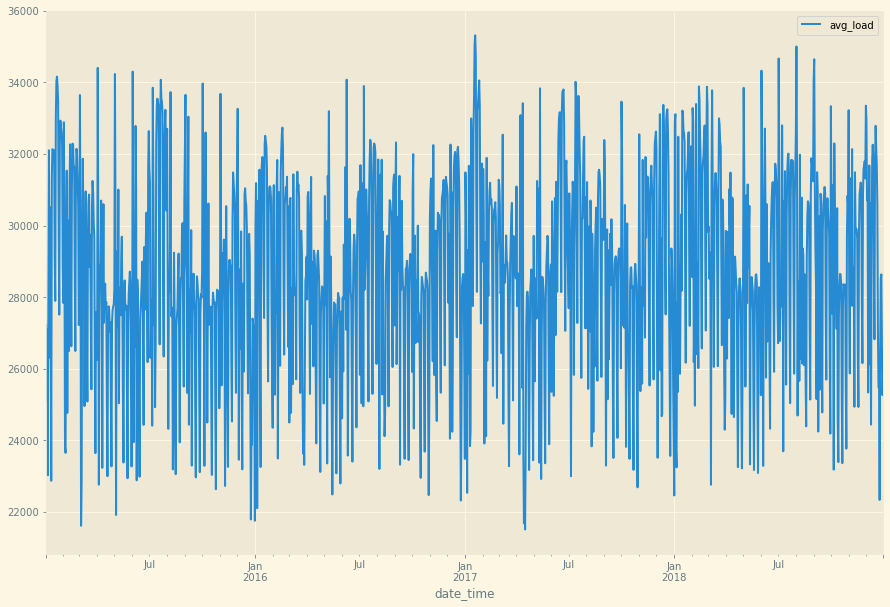

In [53]:
#Plot data
daily_mean.plot(figsize = (15,10))

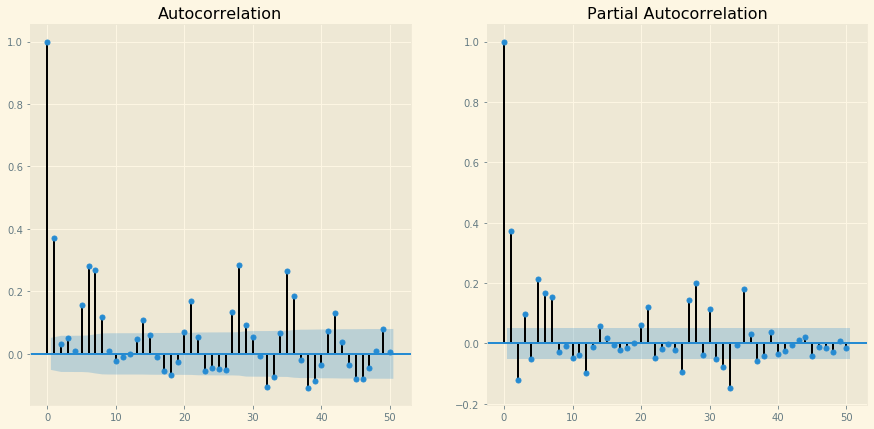

In [51]:
#Import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Create figure
f,ax = plt.subplots(1,2,figsize = (15,7))

#plot Autocorrelations plot
plot_acf(daily_mean['avg_load'],lags=50, ax=ax[0])
plot_pacf(daily_mean['avg_load'],lags = 50,ax=ax[1]);

**Apply Differencing**

In [30]:
#Apply log transform
#df['load_log'] = np.log(df['load'])

#Difference load by 24 to remove seasonality
df['load_differenced1'] = df['load'].diff()
df['load_differenced2'] = df['load_differenced1'].diff(24)

#2nd order differencing
#df['load_log_differenced1'] = np.log(df['load_differenced1'])

#Remove na's
df.dropna(inplace = True)

#Check
display(df.head())

,load,load_forecast,load_differenced1,load_differenced2
date_time,,,,
2015-01-02 01:00:00,24935.0,25397.0,-2135.0,-1132.0
2015-01-02 02:00:00,23214.0,23640.0,-1721.0,-73.0
2015-01-02 03:00:00,22540.0,22638.0,-674.0,774.0
2015-01-02 04:00:00,22096.0,22238.0,-444.0,578.0
2015-01-02 05:00:00,22066.0,22299.0,-30.0,329.0


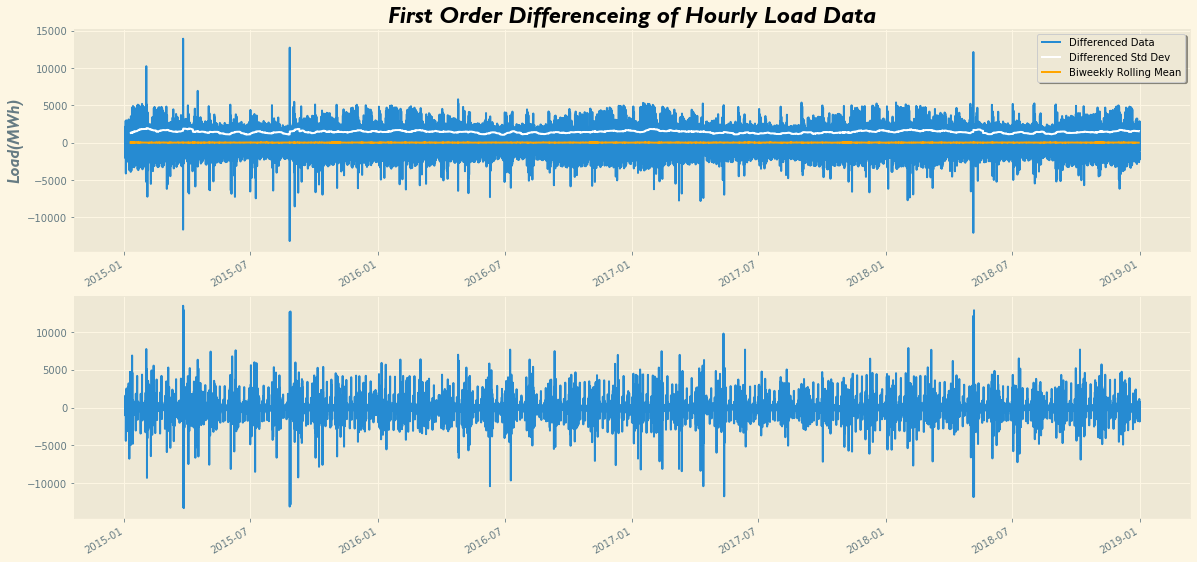

In [31]:
#Set figure to plot
f, ax = plt.subplots(2,1,figsize=(20,10))

#Plot load_deseasoned1
timeseries_plot(df['load_differenced1'], label = 'Differenced Data', ax = ax[0]);

#Check for any lingering trend with smoothing 
timeseries_plot(df['load_differenced1'].rolling(24*7*2,24*7).std(), label = 'Differenced Std Dev',color = 'white', ax = ax[0]);

timeseries_plot(df['load_differenced1'].rolling(24*7*2,24*7).mean(), label = 'Biweekly Rolling Mean', ylabel='Load(MWh)',label_dict=font_label,
                legend = True, color = 'orange', title = 'First Order Differenceing of Hourly Load Data',title_dict=font_title,ax = ax[0]);

# #Plot load_deseasoned2
timeseries_plot(df['load_differenced2'], label = 'Differenced Data', ax = ax[1]);


# timeseries_plot(df['load_differenced2'].rolling(24*7*2,24*7).std(), label = 'Differenced Std Dev',color = 'white', ax = ax[1]);

# #Check for any lingering trend with smoothing 
# timeseries_plot(df['load_differenced2'].rolling(24*7*2,24).mean(), label = 'Biweekly Rolling Mean', ylabel='Load(MWh)',label_dict=font_label,
#                 legend = True, color = 'orange', title = 'Second Order Differenceing of Hourly Load Data',title_dict=font_title,ax = ax[1]);

###Set plot aesthetics###
#Axes
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}".format(int(x))))

# ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

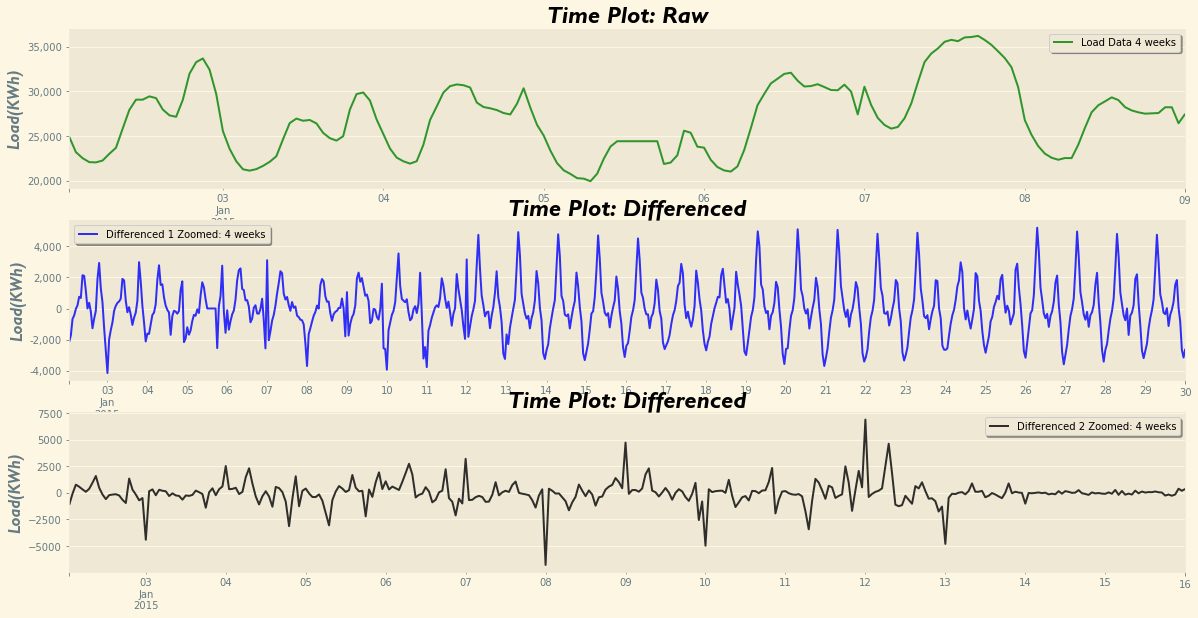

In [32]:
#Import timeseries_plot
from TimeseriesPlotter import timeseries_plot

#Set figure
f, ax = plt.subplots(3,1,figsize = (20,10))

#Plot training and test data

timeseries_plot(df.load[:24*7], color = 'g', ax = ax[0], legend = True,alpha = .8,label = 'Load Data 4 weeks', 
                title='Time Plot: Raw', title_dict=font_title,
               ylabel='Load(KWh)', label_dict=font_label)
timeseries_plot(df.load_differenced1[:24*7*4], color = 'blue', ax = ax[1], legend = True,alpha = .8,label = 'Differenced 1 Zoomed: 4 weeks', 
                title='Time Plot: Differenced', title_dict=font_title,
               ylabel='Load(KWh)', label_dict=font_label)
timeseries_plot(df.load_differenced2[:24*7*2], color = 'black', ax = ax[2], legend = True,alpha = .8,label = 'Differenced 2 Zoomed: 4 weeks', 
                title='Time Plot: Differenced', title_dict=font_title,
               ylabel='Load(KWh)', label_dict=font_label)
###Set plot aesthetics###
#Axes
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '{:,}'.format(int(x))))
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: '{:,}'.format(int(x))))

**Plot ACF and PACF**

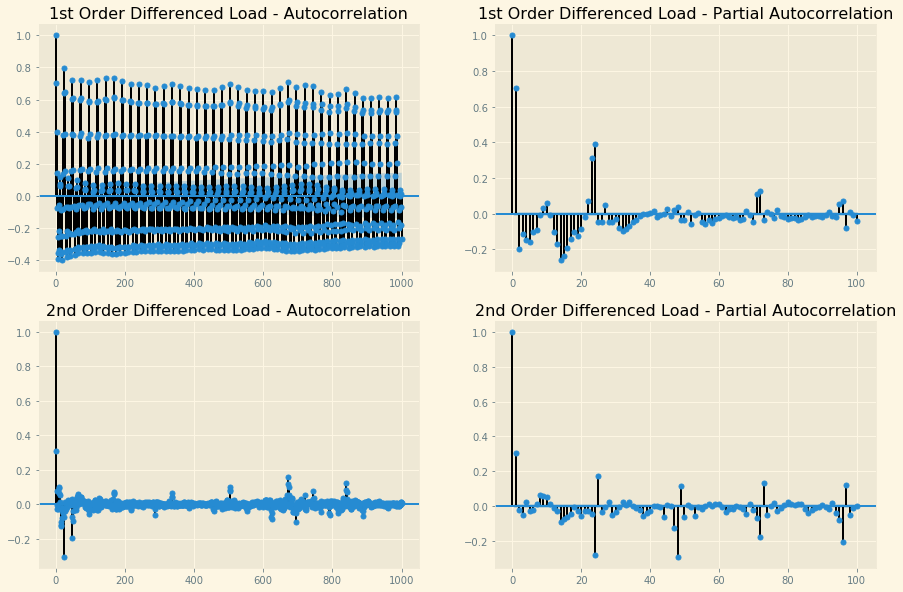

In [33]:
#Import ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Set figure
f, ax = plt.subplots(2,2,figsize = (15,10))

#PLot load_deseasoned1
plot_acf(df.load_differenced1, lags = 1000, ax = ax[0,0], 
         title = '1st Order Differenced Load - Autocorrelation');
plot_pacf(df.load_differenced1, lags = 100, ax = ax[0,1], 
          title='1st Order Differenced Load - Partial Autocorrelation');

#PLot load_deseasoned2
plot_acf(df.load_differenced2, lags = 1000, ax = ax[1,0], 
         title = '2nd Order Differenced Load - Autocorrelation');
plot_pacf(df.load_differenced2, lags = 100, ax = ax[1,1], 
          title='2nd Order Differenced Load - Partial Autocorrelation');

**Test for Stationarity**

In [34]:
#Import tests
from StationarityTests import ADF_KPSS_test, mean_var_test

#Apply ADF_KPSS_test to first order differenced time series
ADF_KPSS_test(df.load_differenced1,1)

ADF Statistic: -34.250958439643064
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.001332084618769718
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [35]:
#Test for consitent mean and variance
mean_var_test(df.load_differenced1, 1)

Mean1: -0.030474233864064372
Mean2: 0.0030816640986132513
Var1: 2082418.8791717605
Var2: 2011160.4785615245


In [36]:
#Import tests
from StationarityTests import ADF_KPSS_test, mean_var_test

#Apply ADF_KPSS_test to first order differenced time series
ADF_KPSS_test(df.load_differenced2,24)

ADF Statistic: -47.417829651942384
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 0.0008423947785750264
P-Value: 0.1
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739


In [37]:
#Test for consitent mean and variance
mean_var_test(df.load_differenced2, 24)

Mean1: -0.1907834627683874
Mean2: 0.13522928444977442
Var1: 867579.691730953
Var2: 777012.058007941


**Resampling data**

Might be a better idea to get the daily energy load as opposed to the hourly load

### Split data into training and test sets

In [38]:
#We'll do an 80:20 split
split = round(len(df) * .8)

#Split data into training and test sets
df_train = df[:split]
df_test=df[split:]

#Check shapes
print('Training set shape:', df_train.shape)
print('Test set shape:', df_test.shape)

Training set shape: (28038, 4)
Test set shape: (7009, 4)


### Export files as csv

In [39]:
#Set path location
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write files
df_train.to_csv(path + '/2020_0517_load_train.csv')
df_test.to_csv(path + '/2020_0517_load_test.csv')